<a href="https://colab.research.google.com/github/shreyakumar05/House-Price-Prediction/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#data preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#reading the data
data = pd.read_csv("part1.csv")
pd.pandas.set_option('display.max_columns',None)

Describing the data

In [ ]:
data.head(5)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [ ]:
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [ ]:
data.shape

(414, 9)

Data cleaning

In [ ]:
print("Missing Values by Column")
print("-"*30)
print(data.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",data.isna().sum().sum())

Missing Values by Column
------------------------------
Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [ ]:
#normalising the data
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.00951267, 0.00951267, 1.        , ..., 0.71932284, 0.        ,
        0.1575592 ],
       [0.04380939, 0.04380939, 0.9       , ..., 0.71145137, 0.5       ,
        0.76320583],
       [0.08331505, 0.08331505, 0.5       , ..., 0.75889584, 1.        ,
        0.5992714 ],
       ...,
       [0.05686115, 0.05686115, 0.7       , ..., 0.71522536, 0.        ,
        0.09198543],
       [0.0125958 , 0.0125958 , 0.5       , ..., 0.72395946, 0.        ,
        0.17759563],
       [0.0103754 , 0.0103754 , 0.9       , ..., 0.75016174, 0.5       ,
        0.63296903]])

Relationships between feature variables

Text(0.5, 1.0, 'House price vs House Age')

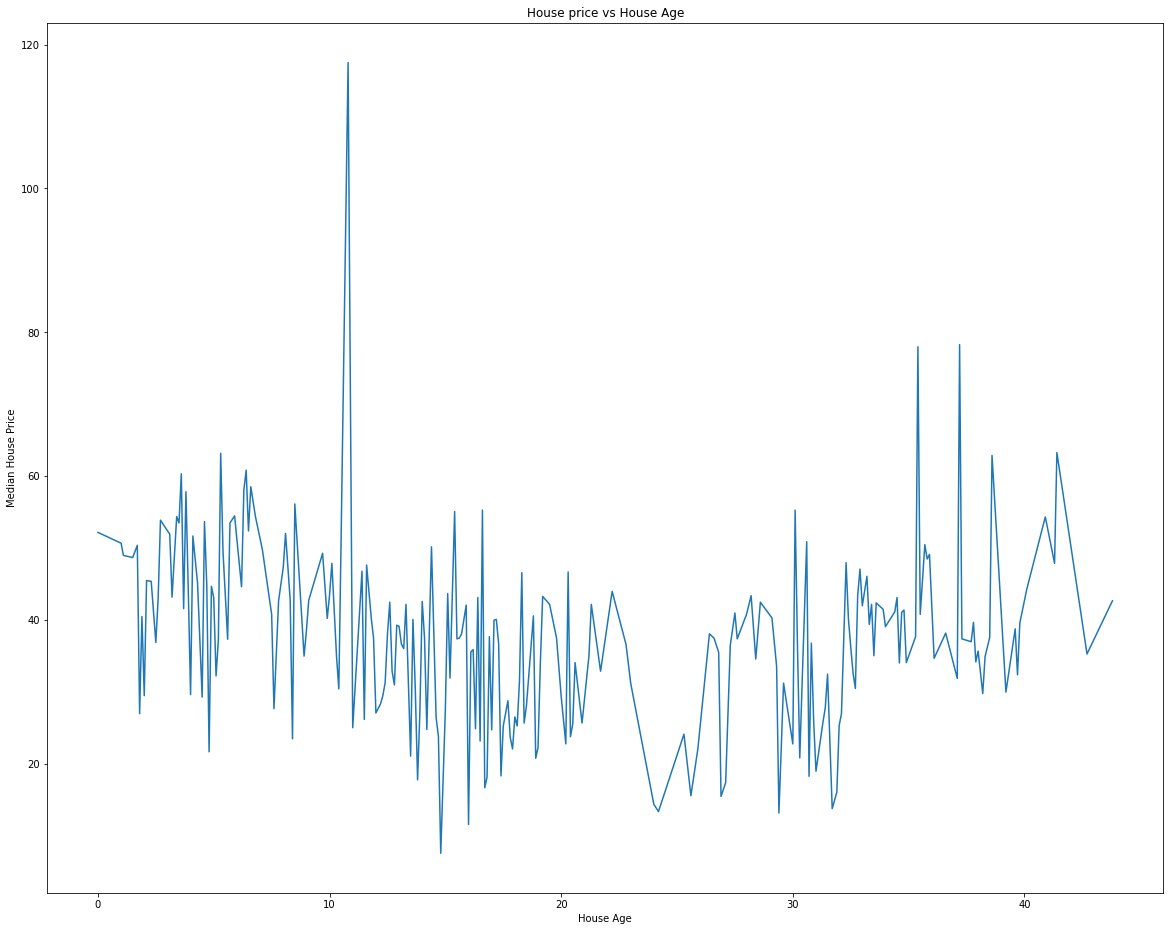

In [ ]:
data.groupby('House Age')['House price of unit area'].median().plot(figsize=(20,16))
plt.xlabel('House Age')
plt.ylabel('Median House Price')
plt.title('House price vs House Age')

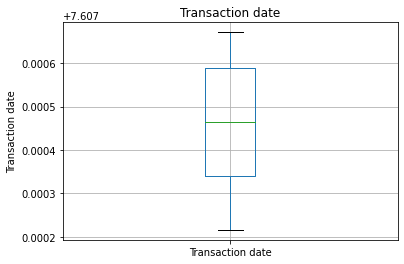

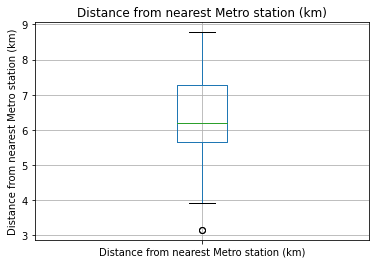

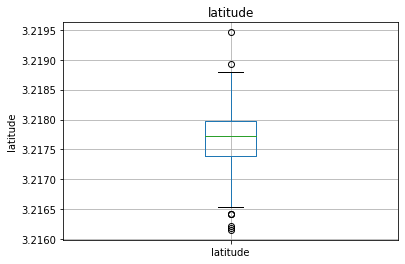

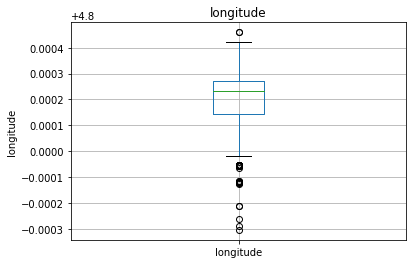

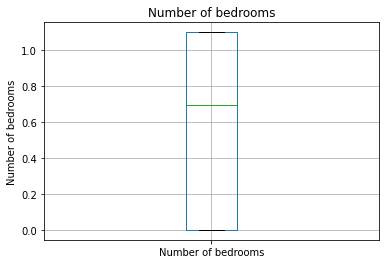

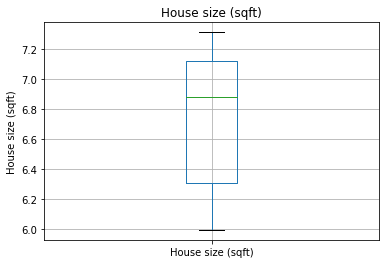

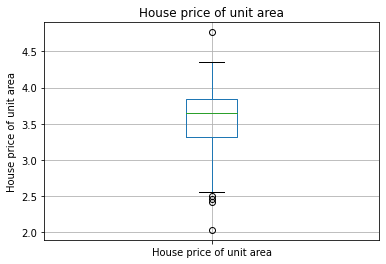

In [ ]:
#finding outliers
for i in data:
  df = data.copy()
  if 0 in df[i].unique():
    pass
  else:
    df[i]=np.log(df[i])
    df.boxplot(column=i)
    plt.ylabel(i)
    plt.title(i)
    plt.show()


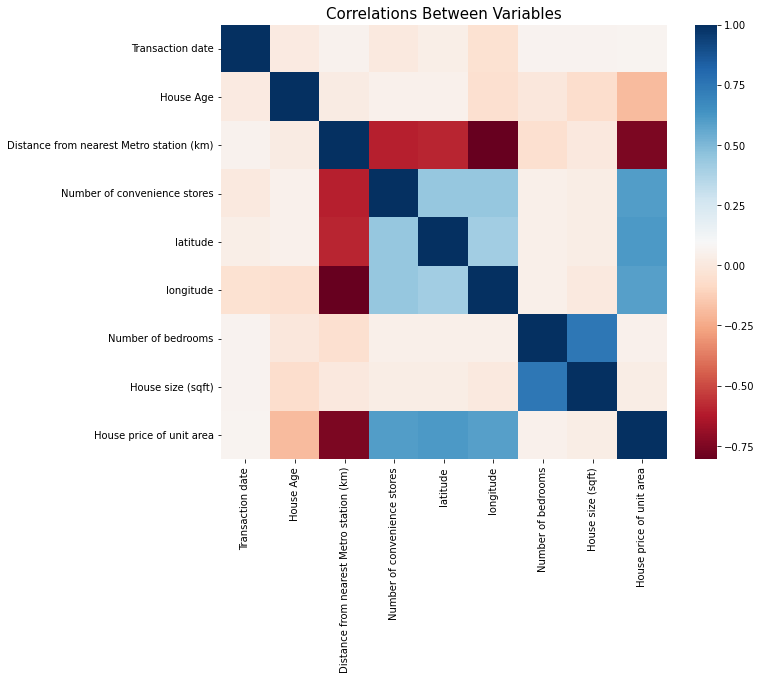

In [ ]:
#correlations heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [ ]:
#transforming data
important_num_cols = list(df.corr()["House price of unit area"][(df.corr()["House price of unit area"]>0.50) | (df.corr()["House price of unit area"]<-0.50)].index)
cat_cols = ["Transaction date", "House Age","Distance from nearest Metro station (km)","Number of convenience stores","latitude","longitude","Number of bedrooms","House size (sqft)","House price of unit area"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rmse - root mean square deviation

mae - mean absolute error

mse - mean squared error

r_sqaured - r2 score

In [ ]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [ ]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

1. Linear Regression Model

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.13672878057421453
MSE: 0.03647683141279868
RMSE: 0.19098908715630503
R2 Score: 0.7787898708305897
------------------------------
RMSE Cross-Validation: 0.21991707540964955


2. Ridge Regression

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.14108679602910315
MSE: 0.0390054779514415
RMSE: 0.19749804543701566
R2 Score: 0.7634551444913743
------------------------------
RMSE Cross-Validation: 0.22933795892241124


3. Lasso Regression

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.17448515459116096
MSE: 0.05514322552759682
RMSE: 0.23482594730480025
R2 Score: 0.6655893736017431
------------------------------
RMSE Cross-Validation: 0.257630590254316


4. Random Forest 

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.12113049125145427
MSE: 0.02978914460515796
RMSE: 0.1725953203454774
R2 Score: 0.8193466847111859
------------------------------
RMSE Cross-Validation: 0.18952113289342284


5. Decision Tree

In [ ]:
decision_tree = DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
predictions = decision_tree.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Decision Tree","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


MAE: 0.15314347260730166
MSE: 0.06411780335811824
RMSE: 0.2532149351008314
R2 Score: 0.6111639357487721
------------------------------
RMSE Cross-Validation: 0.18947105237280637


K Nearest Neighbour 

In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
predictions = decision_tree.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "KNeighbors","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


MAE: 0.15314347260730166
MSE: 0.06411780335811824
RMSE: 0.2532149351008314
R2 Score: 0.6111639357487721
------------------------------
RMSE Cross-Validation: 0.18838095147665018


In [ ]:
#sorting the values for dsiplay
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
7,KNeighbors,0.153143,0.064118,0.253215,0.611164,0.188381
4,RandomForestRegressor,0.153143,0.064118,0.253215,0.611164,0.188954
6,Decision Tree,0.153143,0.064118,0.253215,0.611164,0.189471
3,RandomForestRegressor,0.121130,0.029789,0.172595,0.819347,0.189521
5,RandomForestRegressor,0.153143,0.064118,0.253215,0.611164,0.190388
0,LinearRegression,0.136729,0.036477,0.190989,0.778790,0.219917
1,Ridge,0.141087,0.039005,0.197498,0.763455,0.229338
2,Lasso,0.174485,0.055143,0.234826,0.665589,0.257631


Comparison of different machine learning model on the same dataset

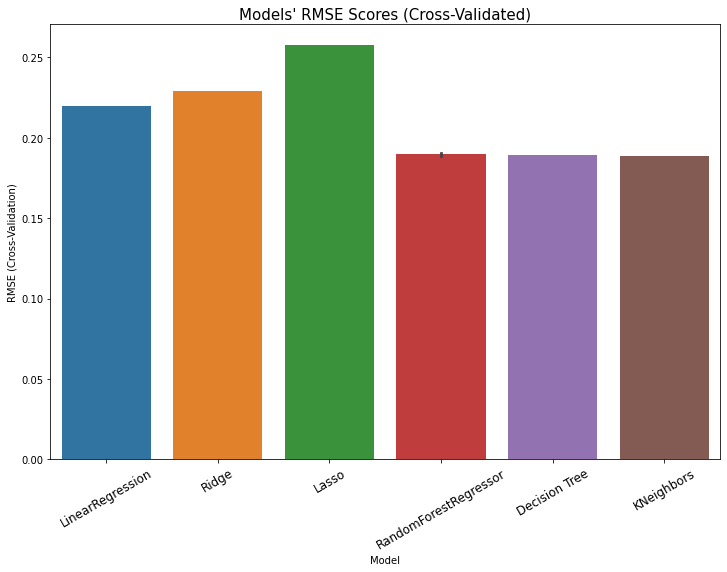

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

RMSE is a good measure of how accurately the model predicts the response. It's the most important criterion for fit if the main purpose of the model is prediction. Therefore, lower values of RMSE indicate better fit.

So, from this visualisation of comparison, we can say that since Random Forest, Decision Tree and K nearest neighbours have lesser RMSE values from the Regression models, they are a better way to predict house prices under given circumstances.

Thank you~